In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly as py
import math as math
import plotly.plotly as ply
import plotly.graph_objs as go


In [3]:
#Load csv
df=pd.read_csv("C:\susan\cloud\clusterdata-2011-2\machine_events\machine_events.csv")
df.shape

(37780, 6)

In [4]:
#See the unique machines in the cluster
print("No of unique machines in the cluster : ",df.MachineId.nunique())

No of unique machines in the cluster :  12583


In [5]:
#Number of machines added initially
print("No of machines added initially : ",df[(df.Timestamp == 0) ].MachineId.count())

No of machines added initially :  12477


In [6]:
#In the dataset, rows corresponding to timestamp=0 are considered as initial machine ADD events
#Fetch rows with no initial machine "ADD" event
machEvent_NoinitialAdd=df[(df.Timestamp != 0)]
#Group the machines based on events
machEvtGrp=machEvent_NoinitialAdd.groupby(['EventType']).MachineId.count()
print(machEvtGrp)

EventType
0    8966
1    8957
2    7380
Name: MachineId, dtype: int64


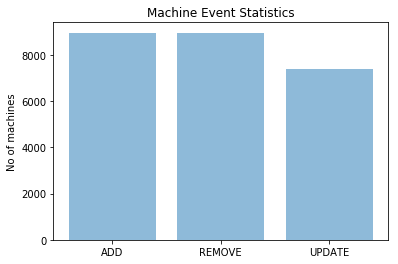

In [7]:
#Plot machine event statistics
events = ('ADD', 'REMOVE', 'UPDATE')
y_pos = np.arange(len(events)) 
plt.bar(y_pos, machEvtGrp, align='center', alpha=0.5)
plt.xticks(y_pos, events)
plt.ylabel('No of machines')
plt.title('Machine Event Statistics')
plt.show()

In [8]:
# x_axis=["ADD", "REMOVE", "UPDATE"]
# y_axis=list(range(0,9000,1000))
# machEvent_NoinitialAdd.groupby(['EventType'])['MachineId'].size().plot(kind='bar',yticks=y_axis,figsize=(20,8))
# plt.xlabel("Event Type")
# plt.ylabel("Count")
# plt.text(1,-1,'matplotlib',text="add")

In [9]:
#No of unique normalized CPU values in sorted order
capacityDf=df[(df.Timestamp == 0)]
cpuValues=sorted(capacityDf.CPUCapacity.dropna().unique())
cpuValues
#capacityDf.CPUCapacity.nunique()

[0.25, 0.5, 1.0]

In [10]:
#No of unique normalized memory values
memValues=sorted(capacityDf.MemoryCapacity.dropna().unique())
memValues
#capacityDf.MemoryCapacity.nunique() 

[0.03085,
 0.061579999999999996,
 0.1241,
 0.2493,
 0.2498,
 0.4995,
 0.5,
 0.7490000000000001,
 0.9678,
 1.0]

In [11]:
#Assigning 5 groups to memory values
memoryValues=[0.125,0.25,0.5,0.75,1.0]

In [12]:
# Creates a list containing 3 lists, each of 5 items, all set to 0
w, h = len(memoryValues), len(cpuValues)
data = [[0 for x in range(w)] for y in range(h)] 
col=0
for i in memoryValues:
    row=0
    for j in cpuValues:
        #print("Memory :",i,"CPU :",j," No :", capacityDf[(capacityDf.CPUCapacity == i) & (capacityDf.MemoryCapacity > j-.125) &  (capacityDf.MemoryCapacity <= j)].MachineId.count())
        data[row][col]=capacityDf[(capacityDf.CPUCapacity == j) & (capacityDf.MemoryCapacity > i-.125) &  (capacityDf.MemoryCapacity <= i)].MachineId.count()
        row=row+1
    col=col+1

data[0].append(sum(list(data[0])))
data[1].append(sum(list(data[1])))
data[2].append(sum(list(data[2])))

In [11]:
col_header= ['=%.2f' % x for x in cpuValues]
col_header.insert(0,'Mem/CPU')
col_header.append('Total')

row_header=['~ %.3f' % x for x in memoryValues]
row_header.append('Total')
totCol=[data[0][0]+data[1][0]+data[2][0],
        data[0][1]+data[1][1]+data[2][1],
        data[0][2]+data[1][2]+data[2][2],
        data[0][3]+data[1][3]+data[2][3],
        data[0][4]+data[1][4]+data[2][4]]
totCol.append(sum(list(totCol)))

trace = go.Table(
    header = dict(values=col_header),
    cells  = dict(
        values= [
            [row_header],
            [data[0]],
            [data[1]],
            [data[2]],
            [totCol]
        ]
    ))
cap_table = [trace] 
ply.iplot(cap_table, filename = 'a')

In [14]:
eventFreqDf=df.loc[(df.Timestamp != 0)]
#eventFreqDf['Timestamp']=(eventFreqDf['Timestamp'])/(24*60*60*1000*1000)
eventFreqDf.loc[: ,'Timestamp'] /= (24*60*60*1000*1000)
eventFreqDf['Timestamp']=np.ceil(eventFreqDf['Timestamp'])
print(eventFreqDf)

       Timestamp   MachineId  EventType  \
12477        1.0     5782512          1   
12478        1.0  1438195245          2   
12479        1.0  4820073668          1   
12480        1.0     1272981          1   
12481        1.0   294985247          1   
12482        1.0  6226704737          2   
12483        1.0     8631300          1   
12484        1.0     1272981          0   
12485        1.0     6567863          2   
12486        1.0   331141765          0   
12487        1.0   331141765          2   
12488        1.0  1785749011          2   
12489        1.0  3023676243          2   
12490        1.0  1785749011          2   
12491        1.0  1440305526          2   
12492        1.0     6570572          2   
12493        1.0   294985247          0   
12494        1.0   450512000          0   
12495        1.0   450512000          2   
12496        1.0   317808289          1   
12497        1.0     6609008          2   
12498        1.0      705636          1   
12499      

C:\susan\tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\susan\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\susan\tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0,0.5,'No of machine events')

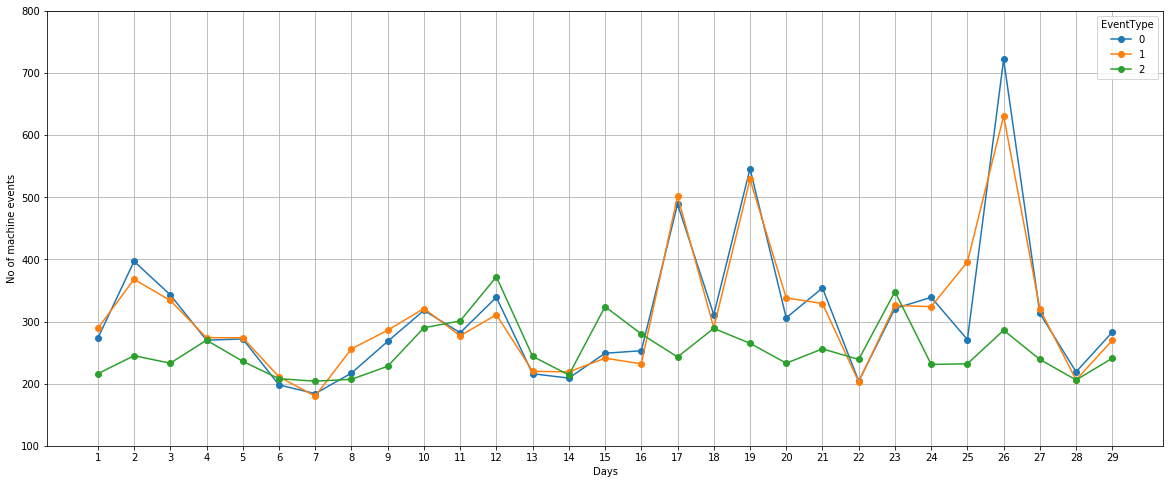

In [12]:
eventFreqDf=df.loc[(df.Timestamp != 0)]
#eventFreqDf['Timestamp']=(eventFreqDf['Timestamp'])/(24*60*60*1000*1000)
eventFreqDf.loc[: ,'Timestamp'] /= (24*60*60*1000*1000)
eventFreqDf= eventFreqDf.sort_values(['Timestamp'], ascending=False)
eventFreqDf.iloc[0:7, 0]=np.floor(eventFreqDf.iloc[0:7, 0].values)
eventFreqDf['Timestamp']=np.ceil(eventFreqDf['Timestamp'])
x_axis=list(range(1,30))
y_axis=list(range(100,900,100))
eventFreqDf.groupby(['Timestamp','EventType']).size().unstack().plot(kind='line',marker='o',grid=True,xticks=x_axis,yticks=y_axis,figsize=(20,8))
plt.xlabel("Days")
plt.ylabel("No of machine events")
#eventFreqDf['Timestamp']
# machEvtGrp=eventFreqDf.groupby(['Timestamp','EventType']).size()
# machEvtGrp

In [229]:
#Plot frequency of daily machine events
# y1=[None]*29
# for i in range(1,30):
#     y1[i-1]=machEvtGrp[i][0]
# y1
# y2=[None]*29
# for x in range(1,30):
#     y2[x-1]=machEvtGrp[x][1]
# y2
# y3=[None]*29
# for x in range(1,30):
#     y3[x-1]=machEvtGrp[x][2]
# y3
# x=list(range(1,30))
# plt.plot(x,y1)
# plt.show()
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

In [97]:
#Group by machines
machineGrp=df.loc[(df.Timestamp != 0)].groupby(['MachineId'])
count=0
downtime=[]
for key, item in grp_df:
    x=machineGrp.get_group(key)
    event=x.EventType
    time=x.Timestamp
    zippedEvent = zip(event, event[1:])
    zippedEventList=list(zippedEvent)
    zippedTime = zip(time, time[1:])
    zippedTimeList=list(zippedTime)
    for i in range(len(zippedEventList)):
        if (1, 0) == zippedEventList[i] :
            dt=np.ceil((zippedTimeList[i][1]-zippedTimeList[i][0])/(1000*1000*60))
            downtime.insert(count,dt)
            count=count+1
print("Frequency of machine downtime : ",count)
print("Longest captured downtime in trace : ",max(downtime))

Frequency of machine downtime :  8860
Longest captured downtime in trace :  17407.0


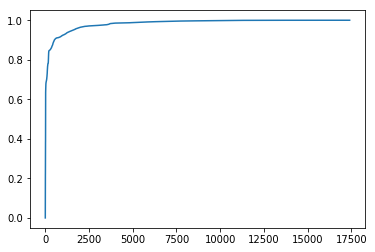

In [114]:
sorted_data = np.sort(downtime) 
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals)
plt.show()

In [110]:
for q in [25, 50, 60, 75 ,90, 95, 100]:
  print ("{}% percentile: {}".format (q, np.percentile(downtime, q)))

25% percentile: 7.0
50% percentile: 17.0
60% percentile: 17.0
75% percentile: 119.0
90% percentile: 520.0
95% percentile: 1576.0499999999993
100% percentile: 17407.0


In [96]:
# def check_for_1_0(seq):
#     return (1, 0) in zip(seq, seq[1:])

# def count_sequence(lst, seq):
#      count = 0
#      len_seq = len(seq)
#      upper_bound = len(lst)-len_seq+1
#      for i in range(upper_bound):
#          if lst[i:i+len_seq] == seq:
#              count += 1
#      return count

# def check_for_1_0(seq):
#     count=0
#     zipped = zip(seq, seq[1:])
#     zippedList=list(zipped)
#     for i in range(len(zippedList)):
#         if (1, 0) == zippedList[i] :
#             count=count+1
#     return count

# grp_df=eventFreqDf.groupby(['MachineId'])
#a=grp_df.get_group(5)
#l=a.EventType
#l
#for i in l:
 #   print(i)

            
            
    #print(key, y)
#     if(check_for_1_0(y)):
#         count=count+1
#         print(count,"true",key)
    #result=result+count_sequence(y,seq)
#    result=result+check_for_1_0(y)

#print(result)
    
    
# seq=[2, 2, 1, 0, 1,0]
# print(seq[1:])
# a=list(zip(seq,seq[1:]))
# a[1][1]
    
# num_bins = 10000
# counts, bin_edges = np.histogram (downtime, bins=num_bins, normed=True)
# # print(counts)
# # print(bin_edges)
# cdf = np.cumsum (counts)
# plt.plot (bin_edges[1:], cdf/cdf[-1])
# for q in [50, 60,75 ,90, 95, 100]:
#   print ("{}%% percentile: {}".format (q, np.percentile(downtime, q)))